In [1]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from collections import OrderedDict, defaultdict

In [14]:
def f(mat):
    mat[:,2] = mat[:,0]+mat[:,1]
    return mat

In [15]:
triplet = np.zeros((100,3))

#Assigning values to Triplet
x = 1.0
y = 1.0
for i in range( len(triplet) ):
    #Setting Value of X
    triplet[i,0]=x
    #Setting value of Y
    triplet[i,1]=y
    y+=1.0
    if y==11.0:
        x+=1.0
        y=1.0

#Calculating its function values
triplet = f(triplet)
np.random.shuffle(triplet)
print (triplet)

[[ 4.  9. 13.]
 [ 4.  6. 10.]
 [ 1.  7.  8.]
 [ 1.  5.  6.]
 [ 7.  1.  8.]
 [ 9.  7. 16.]
 [ 9.  2. 11.]
 [10.  9. 19.]
 [ 6. 10. 16.]
 [ 2.  9. 11.]
 [ 8.  1.  9.]
 [ 3.  8. 11.]
 [ 7.  3. 10.]
 [ 1. 10. 11.]
 [ 4.  1.  5.]
 [ 3.  6.  9.]
 [ 6.  9. 15.]
 [ 5.  8. 13.]
 [ 6.  7. 13.]
 [ 4.  2.  6.]
 [ 2.  1.  3.]
 [ 9. 10. 19.]
 [ 3.  5.  8.]
 [ 4.  4.  8.]
 [ 3.  4.  7.]
 [ 7.  2.  9.]
 [ 3. 10. 13.]
 [ 9.  9. 18.]
 [ 8.  9. 17.]
 [ 1.  4.  5.]
 [ 5.  3.  8.]
 [ 9.  5. 14.]
 [ 6.  2.  8.]
 [ 2.  8. 10.]
 [ 4. 10. 14.]
 [10.  5. 15.]
 [ 4.  7. 11.]
 [ 4.  3.  7.]
 [ 7. 10. 17.]
 [ 9.  3. 12.]
 [ 8.  7. 15.]
 [ 2. 10. 12.]
 [ 6.  6. 12.]
 [10. 10. 20.]
 [ 5. 10. 15.]
 [ 1.  2.  3.]
 [ 8.  3. 11.]
 [ 5.  6. 11.]
 [ 7.  7. 14.]
 [ 6.  3.  9.]
 [ 5.  7. 12.]
 [ 5.  2.  7.]
 [ 3.  2.  5.]
 [ 5.  4.  9.]
 [ 7.  5. 12.]
 [10.  1. 11.]
 [ 1.  6.  7.]
 [10.  8. 18.]
 [ 6.  1.  7.]
 [ 2.  5.  7.]
 [ 5.  9. 14.]
 [ 7.  8. 15.]
 [10.  2. 12.]
 [ 3.  9. 12.]
 [ 7.  4. 11.]
 [ 2.  2.  4.]
 [ 8. 10. 

In [16]:
train_data = triplet[ :int(0.8* len(triplet)), :]
validate_data = triplet[int(0.8* len(triplet)): , :] 

In [17]:
def NoFun(x):
    return x

def NoFun_Derivative(x):
    return 1

def ReLU(x):
    return np.maximum(x,0)

def ReLU_Derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def Sigmoid(x):
    sigm = 1. / (1. + np.exp(-x))
    return sigm

def Sigmoid_Derivative(x):
    sigm = Sigmoid(x)
    return sigm * (1. - sigm)

def TanH(x):
    return np.tanh(x)

def TanH_Derivative(x):
    return 1 - (TanH(x)**2)

def Softmax(x):
    e_x = np.exp(x - np.max(x)) 
    return e_x / np.sum(e_x)

In [18]:
class NeuralNetwork():
    def __init__(self, n, fun, d_fun):
        self.mLayer = len(n)+2
        self.mNeurons = n
        #Adding value for indexing purpose
        self.mFun = [NoFun] + fun
        self.mDFun = [NoFun_Derivative] + d_fun
        
    def __InitializeWeights(self,x,y):
        # No of Inputs and outputs
        self.n = x.shape[0]

        # No of Features (of Input)
        self.m = x.shape[1]

        # No of feature (of Output)
        self.k = y.shape[1]

        #Initializing w,o,z in all layers
        self.w = defaultdict(np.ndarray)
        self.d_w = defaultdict(np.ndarray)
        self.o = defaultdict(np.ndarray)
        self.z = defaultdict(np.ndarray)
        self.mLoss = defaultdict(np.ndarray)
        
        #Setting Array of W and derivative(W)
        self.w[0] = np.random.rand( self.m,self.mNeurons[0] )
        self.d_w[0] = np.zeros((self.m,self.mNeurons[0]))
        
        i = 1
        while i != len(self.mNeurons):
            self.w[i] = np.random.rand(self.mNeurons[i-1],self.mNeurons[i])
            self.d_w[i] = np.zeros((self.mNeurons[i-1],self.mNeurons[i]))
            i+=1
        self.w[i] = np.random.rand(self.mNeurons[i-1],self.k )
        self.d_w[i] = np.zeros((self.mNeurons[i-1],self.k))
        
    def __FeedForward(self,x):
        # Feed Forward
        self.z[0] = x
        self.o[0] = self.mFun[0](self.z[0])
        l = 1
        while l != self.mLayer:
            self.z[l] = np.matmul( self.o[l-1], self.w[l-1] )
            self.o[l] = self.mFun[l]( self.z[l] )
            l+=1
            
        return self.o[l-1]
    
    def GetRMSE(self, o, y):
        error = ( (o-y)**2 ) / 2
        MSE = np.sum(error)
        return np.sqrt(MSE) / np.size(error)
    
    def Train(self, x, y):
        #Adding bias column
        x = np.append(x, np.ones([len(x),1]), 1)
        self.__InitializeWeights(x,y)
        
        eta = 0.00001
        lam = 0.0001
        init_w = copy.copy(self.w)
        
        self.mCounter=0
        self.mPrev_RMSE = 0.1
        self.mRMSE = 0.2;
        while int(self.mRMSE * (10**10)) != int (self.mPrev_RMSE * (10**10)):
            
            #Feed Forward
            self.__FeedForward(x)
            
            #RMSE Error Calculation
            self.mPrev_RMSE = self.mRMSE
            self.mRMSE = self.GetRMSE(self.o[self.mLayer - 1],y)
            
            #Back Propagation
            l = self.mLayer - 1
            
            #Calculating loss for output layer
            self.mLoss[l] = np.multiply( (self.o[l] - y), self.mDFun[l](self.z[l]) )
            
            l-=1
            while l  != -1:
                loss_w = np.matmul( self.mLoss[l+1] ,self.w[l].T )
                self.mLoss[l] = np.multiply( loss_w, self.mDFun[l](self.z[l]) )
                self.d_w[l] = np.matmul( self.o[l].T, self.mLoss[l+1] ) - ( lam * self.w[l] )
                l-=1
            
            i = len(self.mNeurons)
            while i != -1:
                self.w[i] -= eta * self.d_w[i]
                i-=1
            
            self.mCounter+=1

        print("RMSE Value: ", str(self.mRMSE))
        #print("Total Iterations: ", str(self.mCounter))
        
        return self.mCounter
    
    def Predict_Y(self, x):
        x = np.append(x, np.ones([len(x),1]), 1)
        return self.__FeedForward(x)

In [22]:
# neuron for all Hidden layers
n = [ 2, 3, 4, 3, 2 ]

# Activation Functions in Hidden and Output Layer
fun = [ ReLU, ReLU, ReLU, ReLU, ReLU, ReLU ]

#Derivation of Activation Functions
d_fun = [ #Hidden Layers
          ReLU_Derivative,
          ReLU_Derivative,
          ReLU_Derivative,
          ReLU_Derivative,
          ReLU_Derivative,
          #Output Layer
          ReLU_Derivative 
        ]

train_Y = train_data[:,2:3]
train_X = train_data[:, 0:2]

obj = NeuralNetwork( n, fun, d_fun )
obj.Train( train_X, train_Y )

validate_Y = validate_data[:,2:3]
validate_X = validate_data[:, 0:2]
predict_Y = obj.Predict_Y( validate_X )

RMSE Value:  3.4700028970060897e-07


#### Validating Weights

Text(0, 0.5, 'Y')

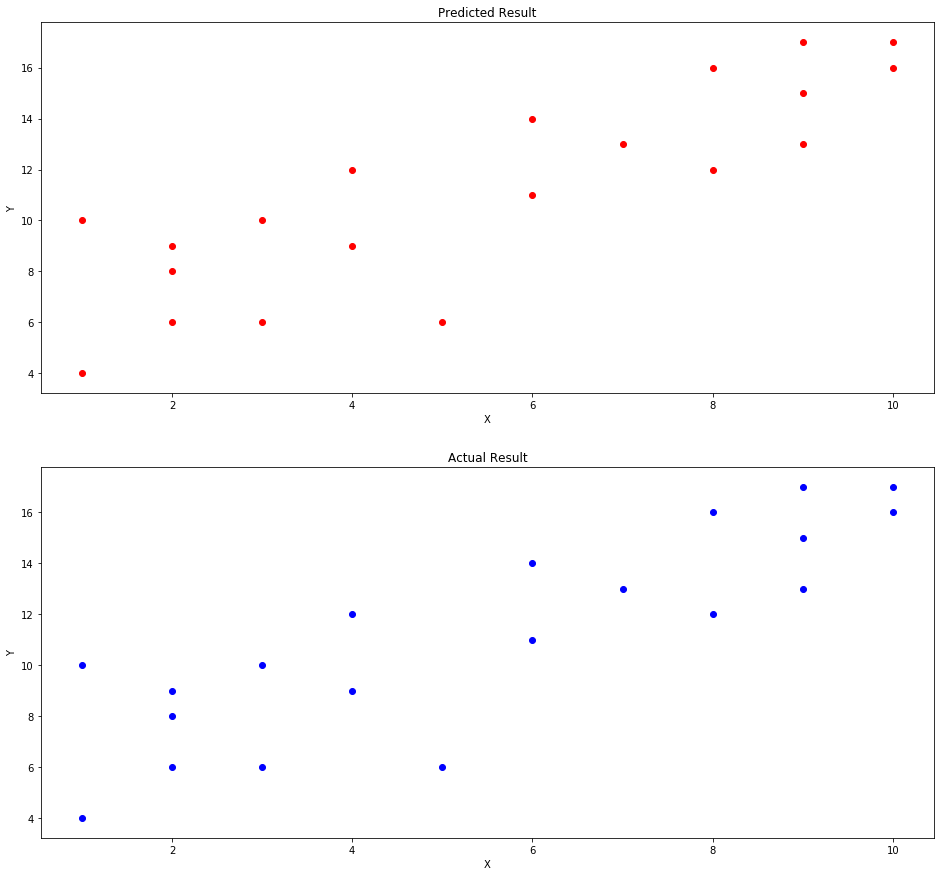

In [23]:
fig, arr = plt.subplots(nrows=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(15)

arr[0].scatter (validate_X[:,0], predict_Y, c='r' )
arr[0].set_title('Predicted Result')
arr[0].set_xlabel('X')
arr[0].set_ylabel('Y')

arr[1].scatter (validate_X[:,0], validate_Y, c='b' )
arr[1].set_title('Actual Result')
arr[1].set_xlabel('X')
arr[1].set_ylabel('Y')

In [24]:
print(predict_Y)
print(validate_Y)

[[11.00000151]
 [12.00000027]
 [ 9.00000366]
 [15.99999661]
 [12.9999992 ]
 [ 9.00000398]
 [16.99999538]
 [10.0000029 ]
 [14.99999737]
 [ 6.00000656]
 [ 6.00000624]
 [13.99999876]
 [15.99999629]
 [10.00000322]
 [12.00000091]
 [ 6.00000672]
 [ 4.00000871]
 [16.99999554]
 [12.99999952]
 [ 8.00000489]]
[[11.]
 [12.]
 [ 9.]
 [16.]
 [13.]
 [ 9.]
 [17.]
 [10.]
 [15.]
 [ 6.]
 [ 6.]
 [14.]
 [16.]
 [10.]
 [12.]
 [ 6.]
 [ 4.]
 [17.]
 [13.]
 [ 8.]]


In [ ]:
ef Forward(self, w, o, activation_fun ):
        z = 
        return z,activation_fun(z)

    def ErrorFunction(self, o, y):
        '''
        index = np.argmax(o, axis = 1)
        probability = o[np.arange(len(o)), index]
        log = np.log(probability)
        Error = -1.0 * np.sum(log) / log.shape[0]
        return Error
        '''
        return 

In [ ]:
# importing required modules 
import PyPDF2 
  
# creating a pdf file object 
pdfFileObj = open('temp.pdf', 'rb') 